First few rows of the dataset:
    Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0          1000                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       NaN           89.0        9.87       NaN  
1    161.6     123.0           82.0        9.78      13.7  
2    243.4     114.0           52.0        6.06      12.2  
3    299.4      71.0           57.0        3.10       6.6  
4    166.7     113.0           41.0        7.42      10.1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-

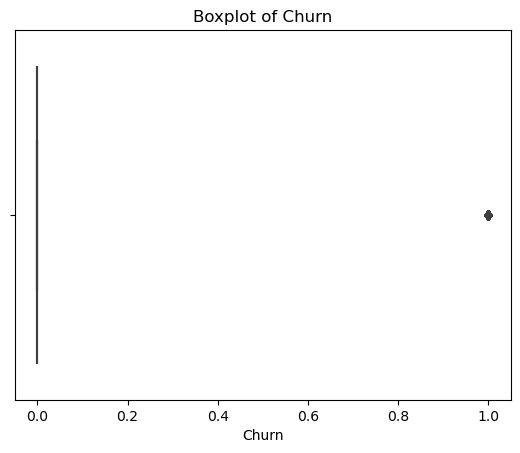

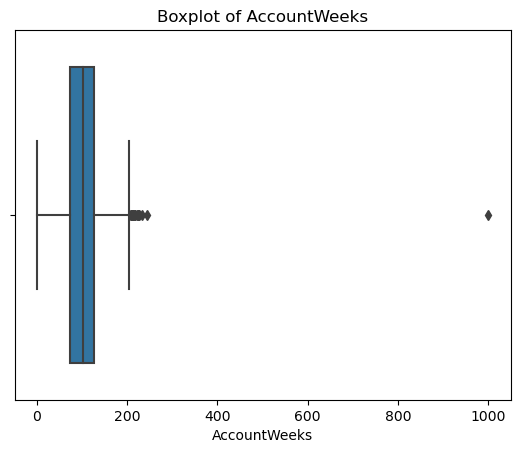

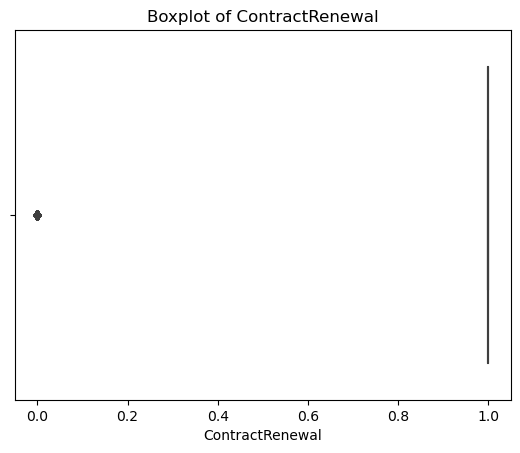

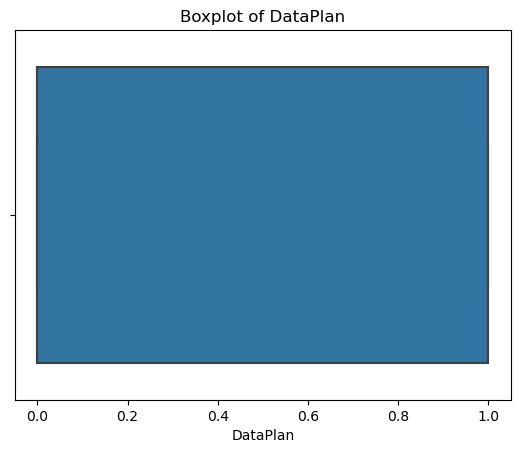

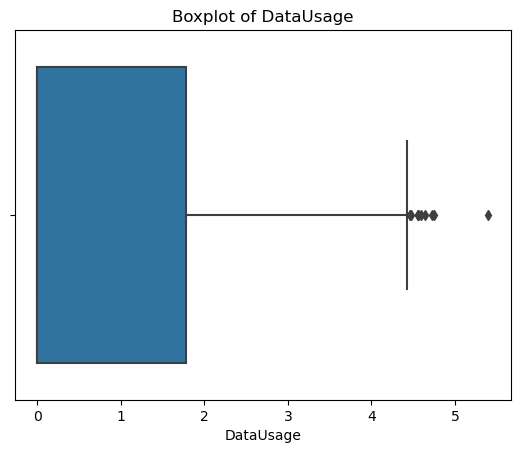

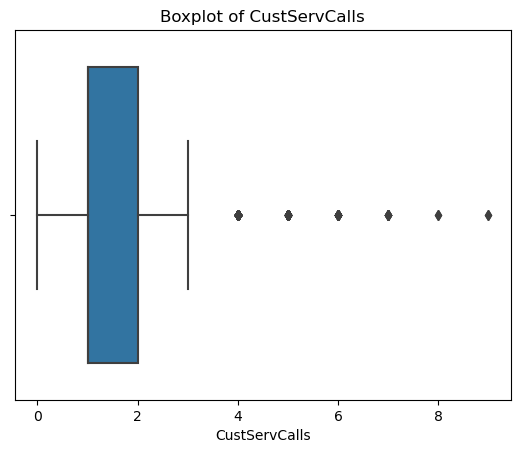

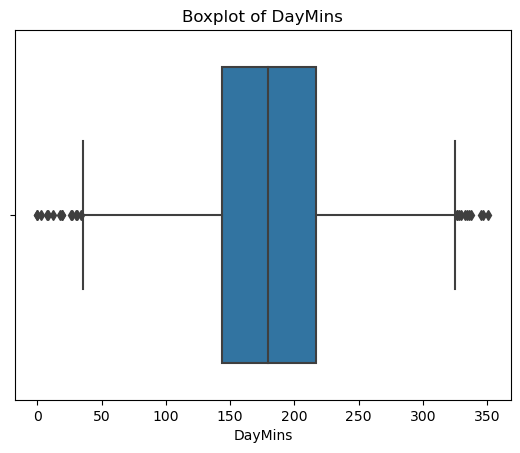

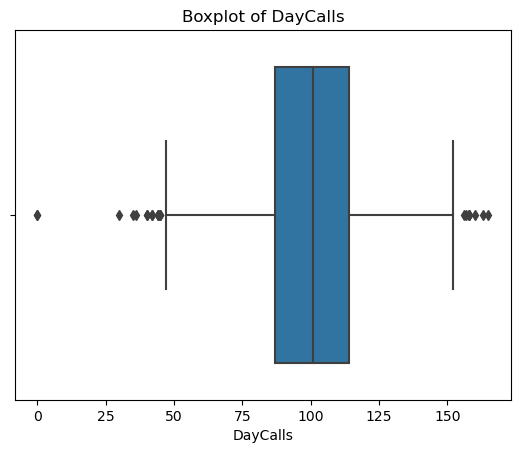

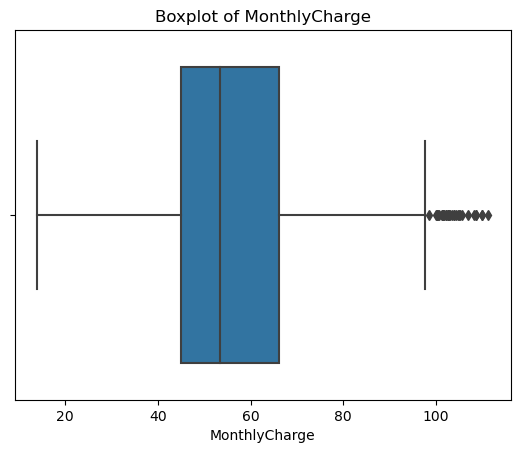

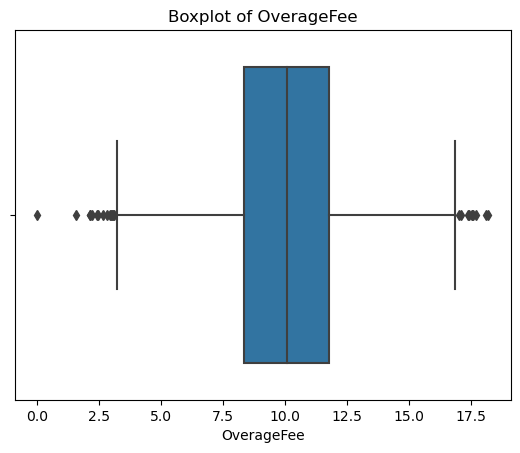

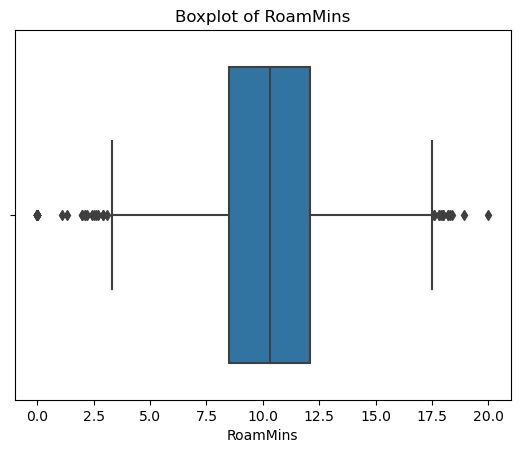


First few rows of the normalized dataset:
    Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0    0.0      0.519608              0.0       1.0   0.811404       0.333333   
1    0.0      0.666667              0.0       0.0   0.000000       0.000000   
2    0.0      0.357843              0.0       0.0   0.074561       0.000000   
3    0.0      0.818627              0.0       0.0   0.000000       0.333333   
4    0.0      0.460784              0.0       0.0   0.096491       1.000000   

    DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0  0.460739  0.721154       0.848329    0.488823  0.746479  
1  0.775597  0.634615       0.462725    0.211624  0.640845  
2  0.561201  0.759615       0.429306    0.368852  0.422535  
3  0.334488  0.461538       0.192802    0.151267  0.570423  
4  0.441493  0.384615       0.467866    0.682563  0.647887  

Statistical summary of the dataset:
         Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
cou

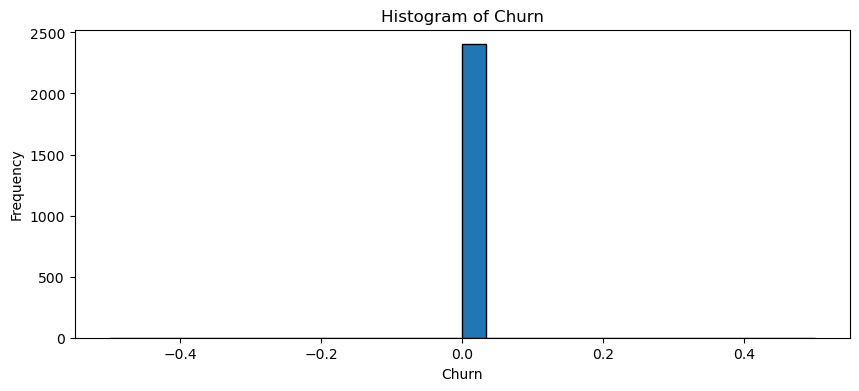

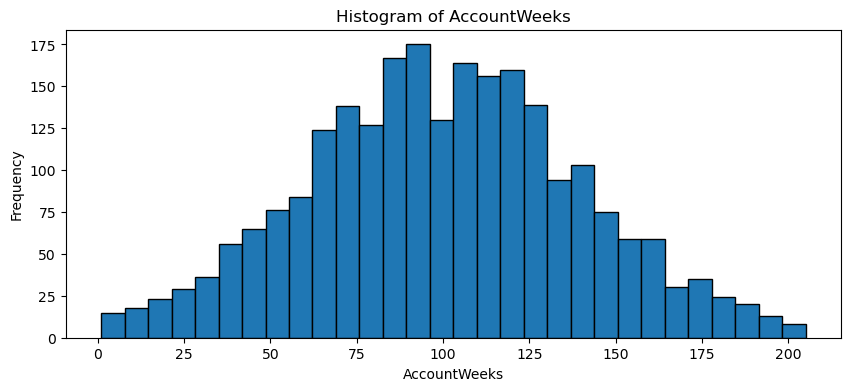

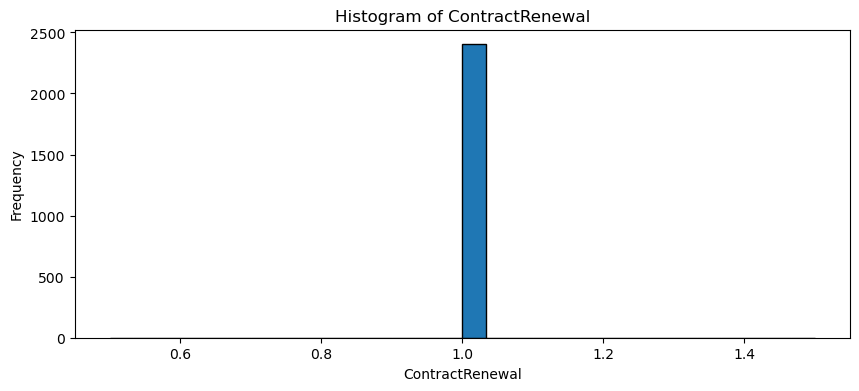

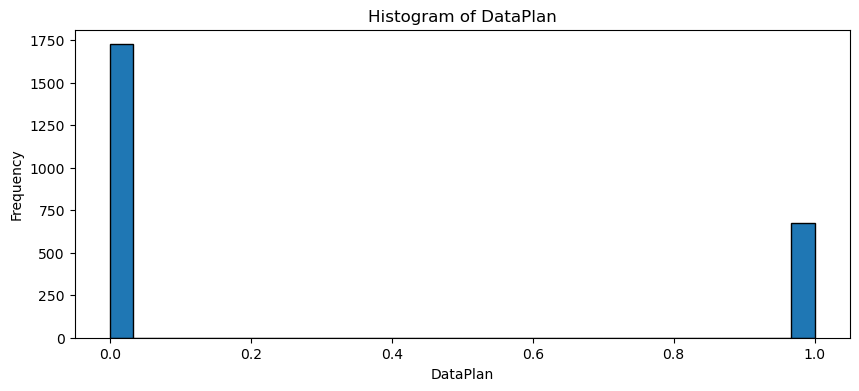

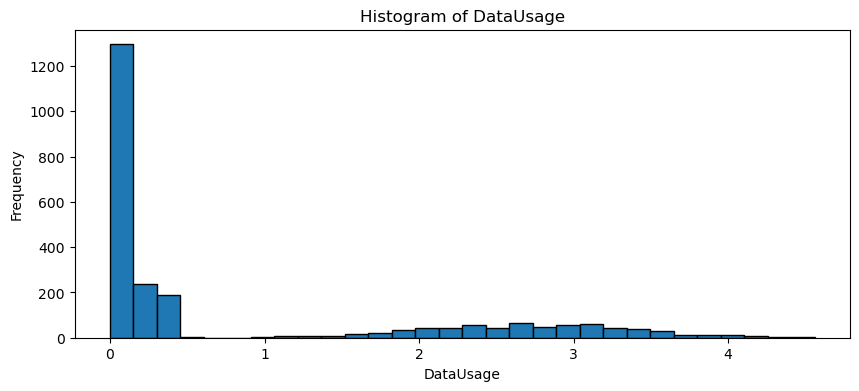

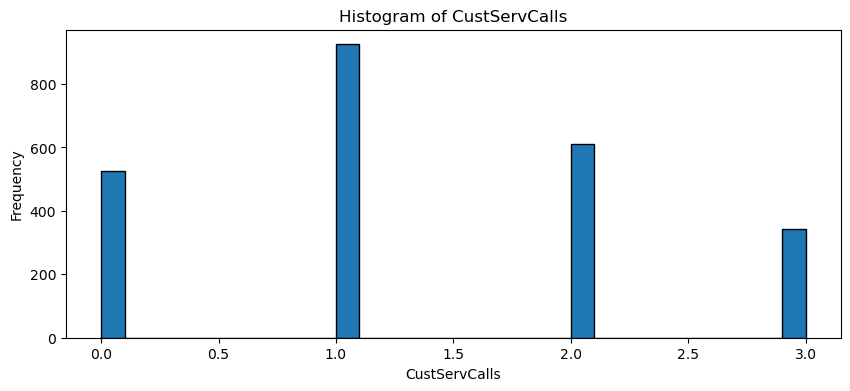

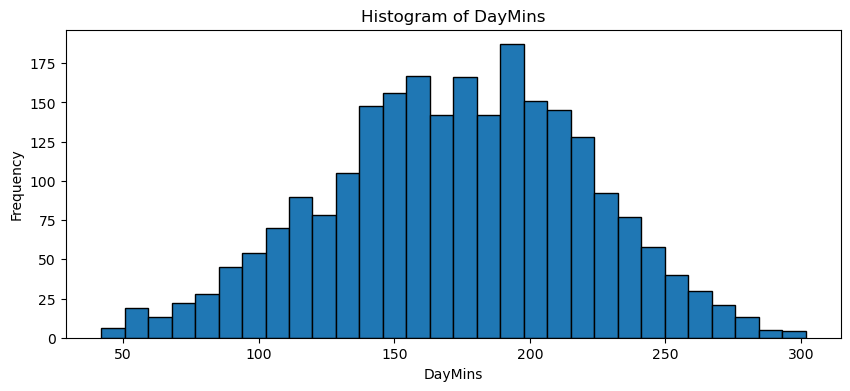

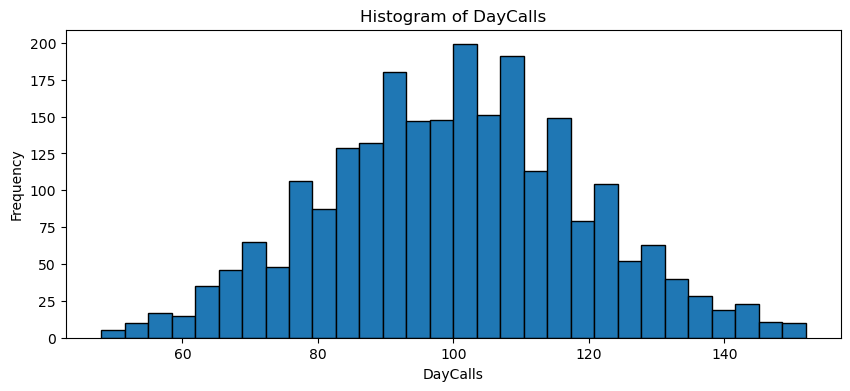

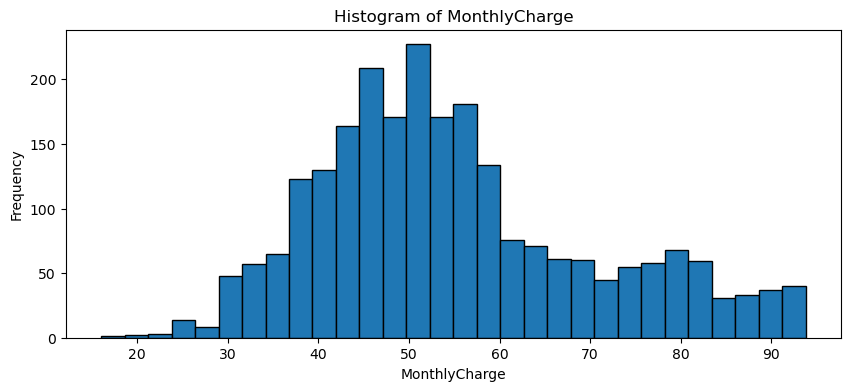

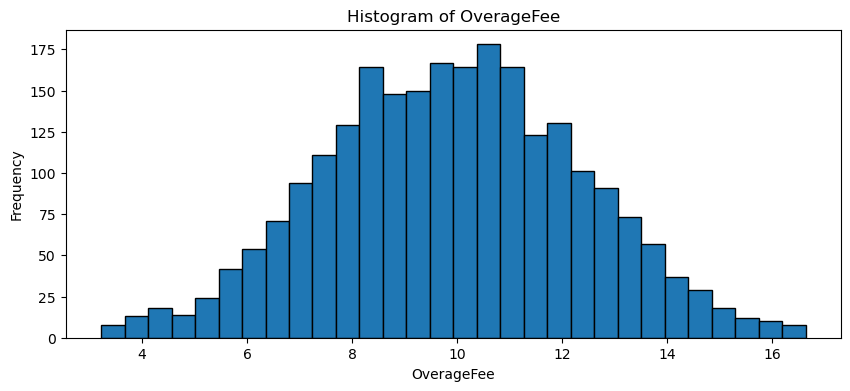

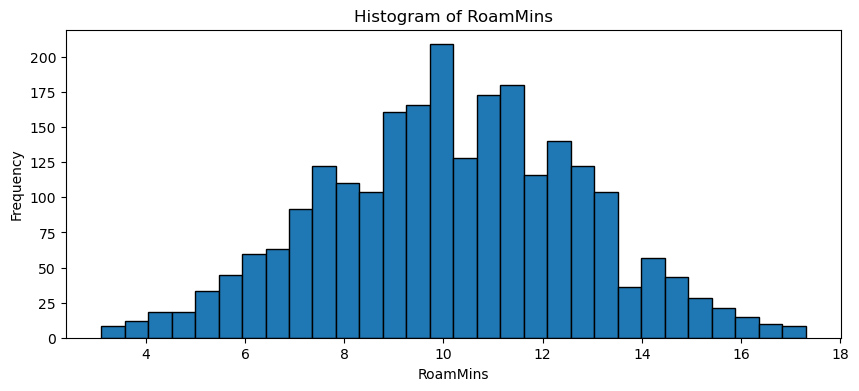

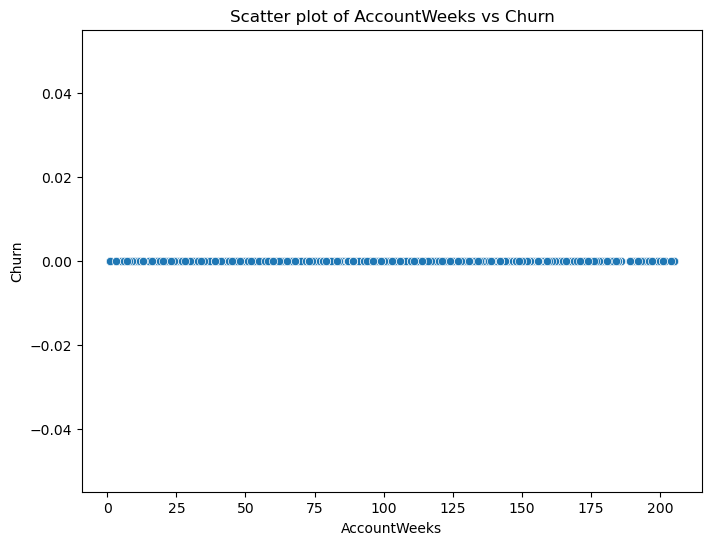

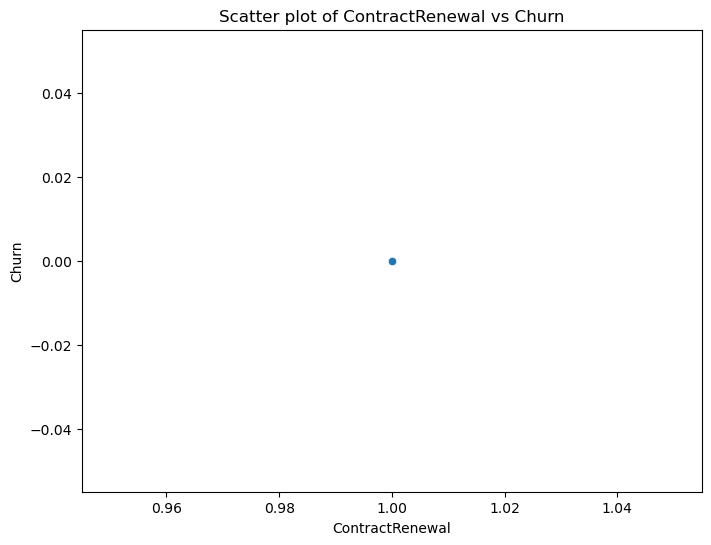

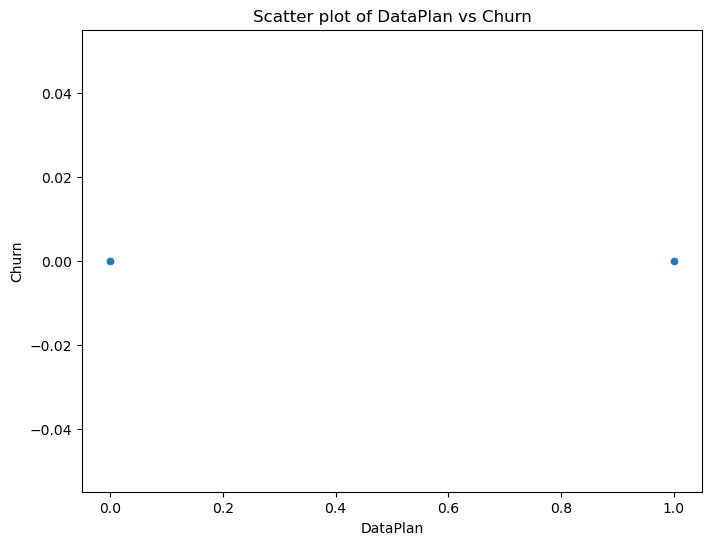

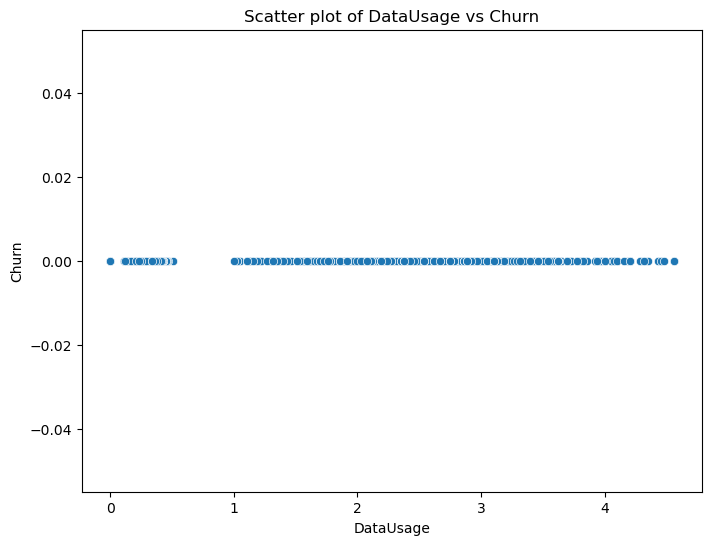

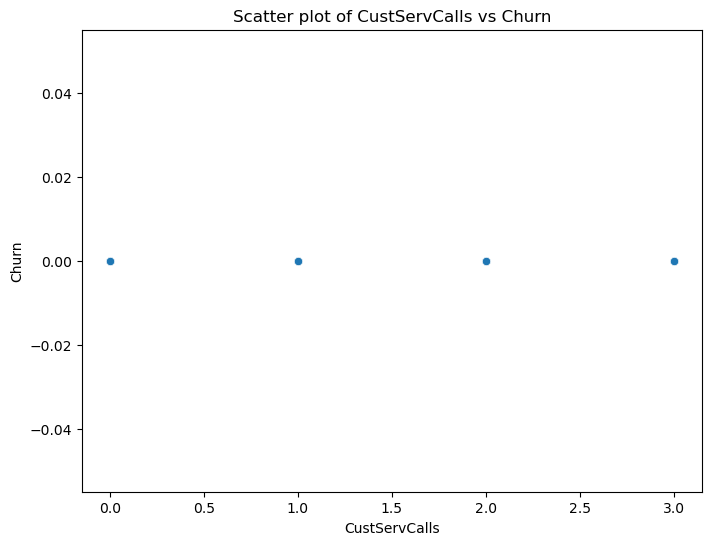

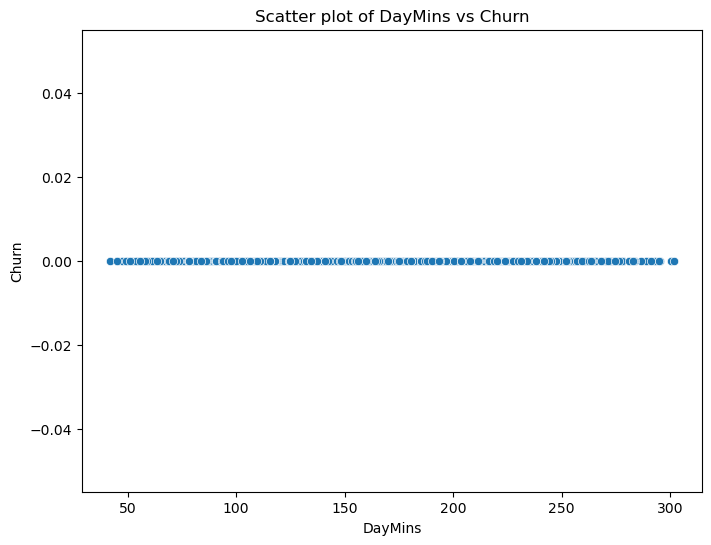

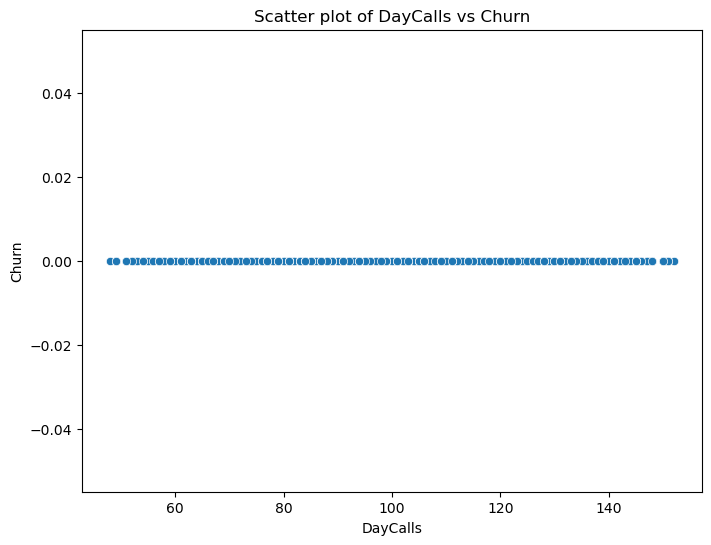

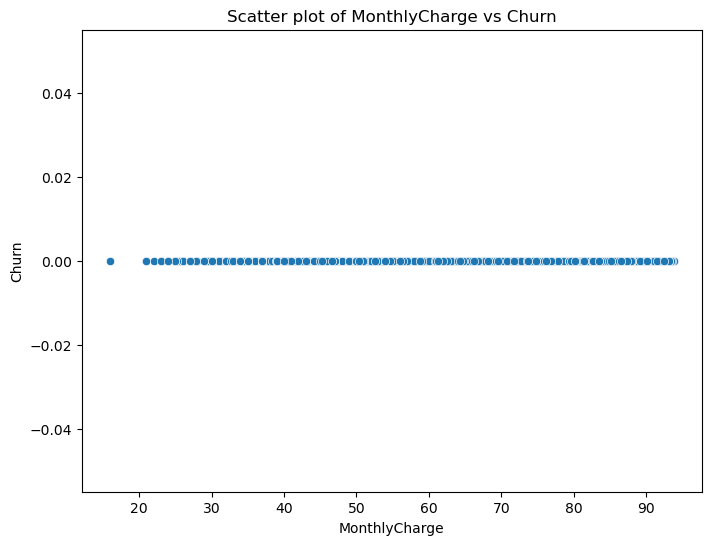

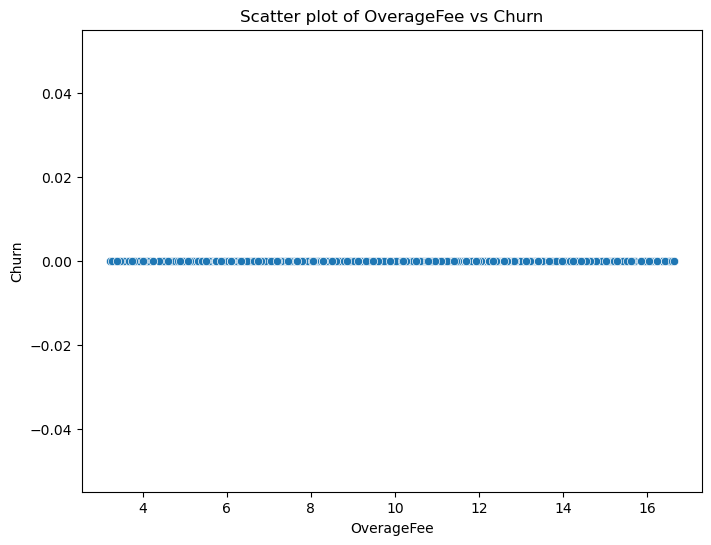

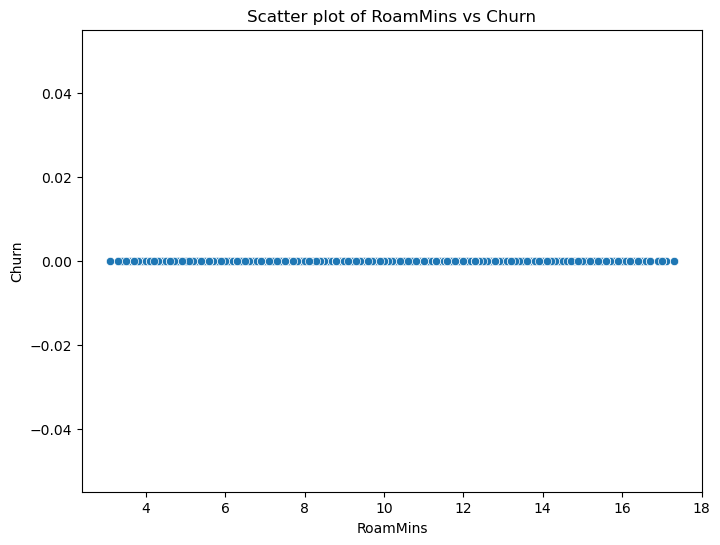

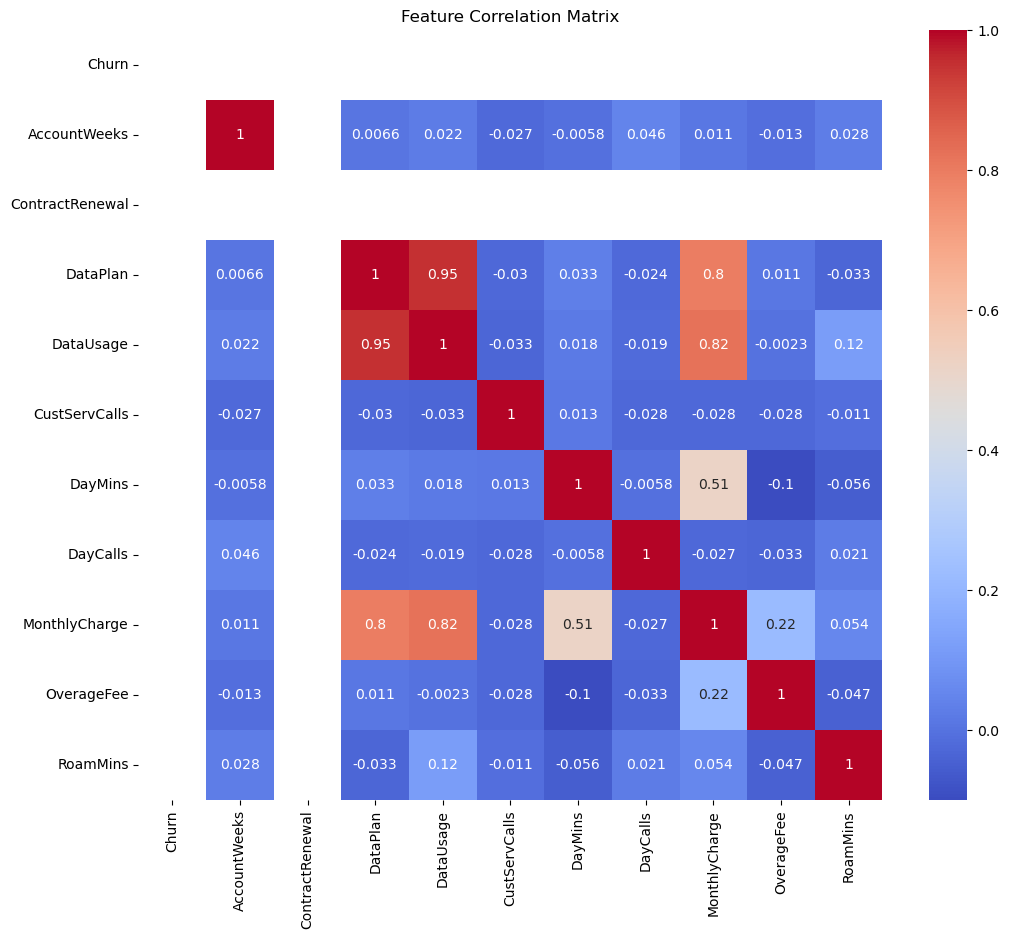


Correlation with target variable (Churn):
 Churn             NaN
AccountWeeks      NaN
ContractRenewal   NaN
DataPlan          NaN
DataUsage         NaN
CustServCalls     NaN
DayMins           NaN
DayCalls          NaN
MonthlyCharge     NaN
OverageFee        NaN
RoamMins          NaN
Name: Churn, dtype: float64


In [1]:
# Customer Churn Analysis

## Step 1: Importing the Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Step 2: Loading the Dataset
df = pd.read_csv('customer_churn.csv')

## Step 3: Basic Exploration of the Dataset
print("First few rows of the dataset:\n", df.head())
print("\nDataset Info:\n", df.info())
print("\nMissing values in each column:\n", df.isnull().sum())

## Step 4: Handling Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill missing values in numerical columns with mean
for feature in df.select_dtypes(include=['object']).columns:
    df[feature].fillna(df[feature].mode()[0], inplace=True)  # Fill missing values in categorical columns with mode

print("\nMissing values after handling:\n", df.isnull().sum())

## Step 5: Handling Outliers
numerical_features = df.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

## Step 6: Encoding Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)

## Step 7: Feature Scaling (Normalization/Standardization)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_encoded)
df_normalized = pd.DataFrame(scaled_features, columns=df_encoded.columns)

print("\nFirst few rows of the normalized dataset:\n", df_normalized.head())

## Step 8: Exploratory Data Analysis (EDA)
# Statistical Analysis
print("\nStatistical summary of the dataset:\n", df.describe())

# Histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    plt.hist(df[feature], bins=30, edgecolor='k')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Scatter plots to identify relationships
for feature in numerical_features:
    if feature != 'Churn':  # Assuming 'Churn' is the target variable
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[feature], y=df['Churn'])
        plt.title(f'Scatter plot of {feature} vs Churn')
        plt.xlabel(feature)
        plt.ylabel('Churn')
        plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Potential predictors of churn
print("\nCorrelation with target variable (Churn):\n", correlation_matrix['Churn'].sort_values(ascending=False))
